In [46]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns

weekly = pd.read_csv('./TryThis2.csv')
weekly.head(100)

,Week,30YrFRM,30YrFees,15YrFRM,15YrFees,ARM,ARMFees,ARM5.00Margin,Spread,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19
0,4/2/71,7.33,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4/9/71,7.31,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4/16/71,7.31,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4/23/71,7.31,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4/30/71,7.29,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1/26/73,7.43,0.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96,2/2/73,7.43,0.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97,2/9/73,7.43,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98,2/16/73,7.45,0.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
type(weekly)

pandas.core.frame.DataFrame

In [48]:
weekly.columns

Index(['Week', '30YrFRM', '30YrFees', '15YrFRM', '15YrFees', 'ARM', 'ARMFees',
       'ARM5.00Margin', 'Spread', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11',
       'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19'],
      dtype='object')

In [49]:
weekly = weekly.drop('Unnamed: 10', axis=1)
weekly = weekly.drop('Unnamed: 11', axis=1)
weekly = weekly.drop('Unnamed: 12', axis=1)
weekly = weekly.drop('Unnamed: 13', axis=1)
weekly = weekly.drop('Unnamed: 14', axis=1)
weekly = weekly.drop('Unnamed: 15', axis=1)
weekly = weekly.drop('Unnamed: 16', axis=1)
weekly = weekly.drop('Unnamed: 17', axis=1)
weekly = weekly.drop('Unnamed: 18', axis=1)
weekly = weekly.drop('Unnamed: 19', axis=1)

In [50]:
weekly.columns

Index(['Week', '30YrFRM', '30YrFees', '15YrFRM', '15YrFees', 'ARM', 'ARMFees',
       'ARM5.00Margin', 'Spread', 'Unnamed: 9'],
      dtype='object')

In [51]:
WeeklyRatesOnly = weekly[["Week", "30YrFRM", "15YrFRM", "ARM"]]

In [52]:
WeeklyRatesOnly.head()

,Week,30YrFRM,15YrFRM,ARM
0,4/2/71,7.33,NaN,NaN
1,4/9/71,7.31,NaN,NaN
2,4/16/71,7.31,NaN,NaN
3,4/23/71,7.31,NaN,NaN
4,4/30/71,7.29,NaN,NaN


In [56]:
WeeklyRatesOnly.shape

(2649, 4)

In [57]:
WeeklyRatesOnly.size

10596

In [58]:
RatesAfter05 = WeeklyRatesOnly[WeeklyRatesOnly["ARM"].notna()]

In [59]:
RatesAfter05.head(40)

,Week,30YrFRM,15YrFRM,ARM
1762,1/6/05,5.77,5.21,5.03
1763,1/13/05,5.74,5.19,5.05
1764,1/20/05,5.67,5.15,5.05
1765,1/27/05,5.66,5.14,5.02
1766,2/3/05,5.63,5.14,5.00
1767,2/10/05,5.57,5.10,4.99
1768,2/17/05,5.62,5.14,5.05
1769,2/24/05,5.69,5.22,5.05
1770,3/3/05,5.79,5.33,5.17
1771,3/10/05,5.85,5.38,5.22


<AxesSubplot:xlabel='Week', ylabel='ARM'>

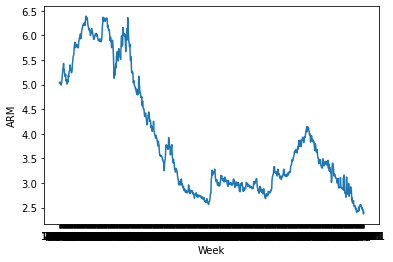

In [60]:
sns.lineplot(x = "Week", y = "ARM",
             data = RatesAfter05)

([<matplotlib.axis.XTick at 0x7f78ce8d1d00>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

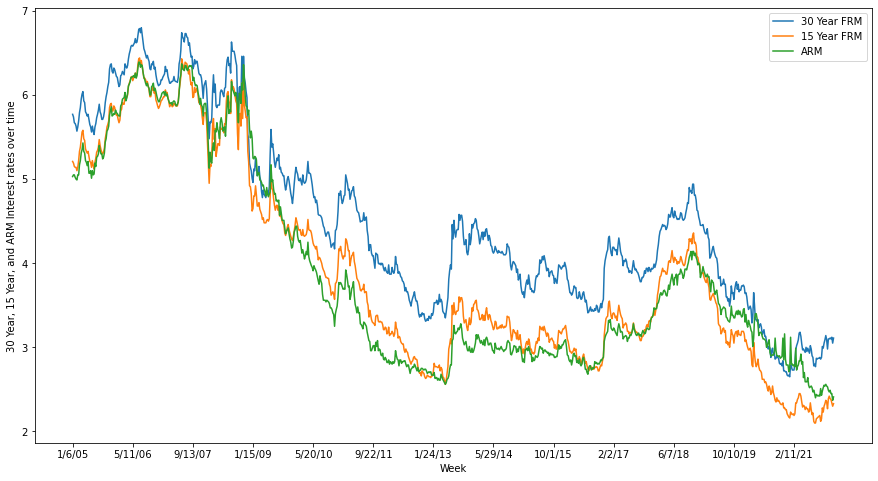

In [78]:
#This is a plot of 30 Year, 15 Year, and ARM but just over the years 2006-2021
import matplotlib.pyplot as plt
sns.lineplot(x = "Week", y = "30YrFRM",
             data = RatesAfter05)
sns.lineplot(x = "Week", y = "15YrFRM",
             data = RatesAfter05)
sns.lineplot(x = "Week", y = "ARM",
             data = RatesAfter05)
plt.ylabel("30 Year, 15 Year, and ARM Interest rates over time")
plt.gcf().set_size_inches(15, 8)
plt.legend(labels=["30 Year FRM","15 Year FRM", "ARM"])
plt.xticks(RatesAfter05['Week'][::70])

([<matplotlib.axis.XTick at 0x7f78d00e22e0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

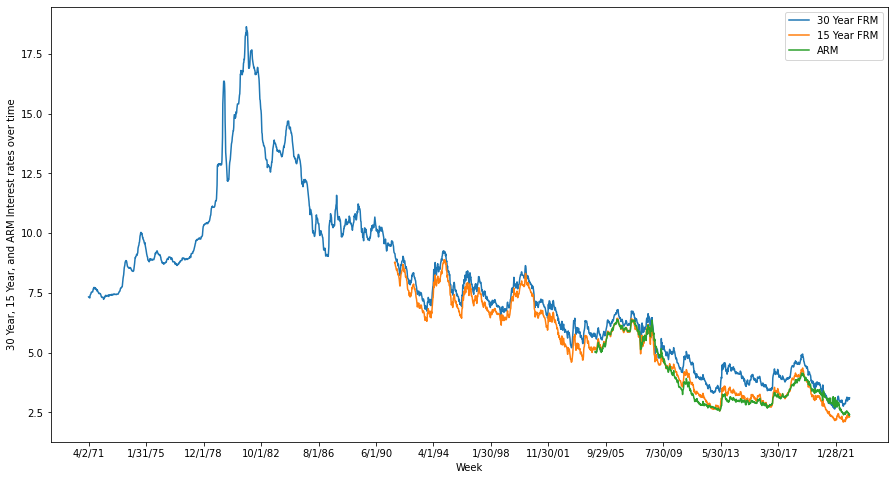

In [79]:
#this is a plot of 30 Year, 15 year, and ARM over the full range
import matplotlib.pyplot as plt
sns.lineplot(x = "Week", y = "30YrFRM",
             data = WeeklyRatesOnly)
sns.lineplot(x = "Week", y = "15YrFRM",
             data = WeeklyRatesOnly)
sns.lineplot(x = "Week", y = "ARM",
             data = WeeklyRatesOnly)
plt.ylabel("30 Year, 15 Year, and ARM Interest rates over time")
plt.gcf().set_size_inches(15, 8)
plt.legend(labels=["30 Year FRM","15 Year FRM", "ARM"])
plt.xticks(WeeklyRatesOnly['Week'][::200])

([<matplotlib.axis.XTick at 0x7f78d2f85550>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

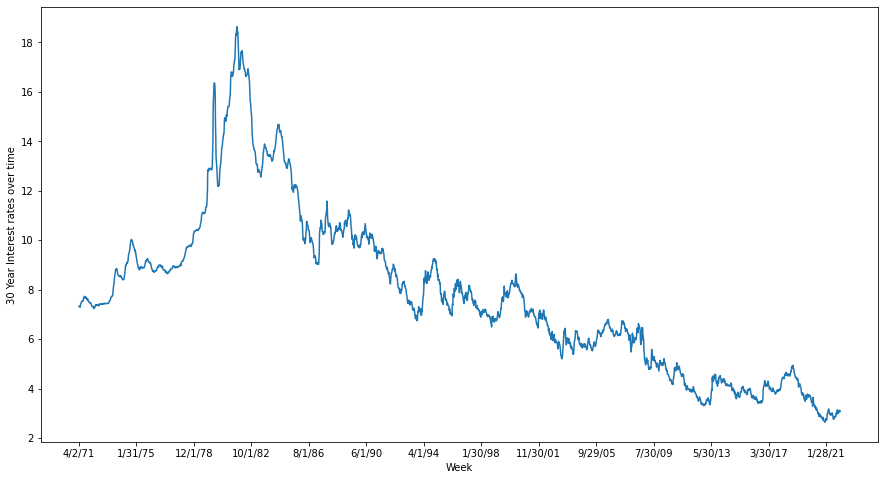

In [80]:
#This is a plot of just the 30 year rates over the full span, from 1971 - 2021
import matplotlib.pyplot as plt
sns.lineplot(x = "Week", y = "30YrFRM",
             data = WeeklyRatesOnly)
plt.ylabel("30 Year Interest rates over time")
plt.gcf().set_size_inches(15, 8)
plt.xticks(WeeklyRatesOnly['Week'][::200])

In [86]:
#Making a data set that includes only the 30-year, and only after 1994:
new = WeeklyRatesOnly[["Week", "30YrFRM"]]
new['Week'] = pd.to_datetime(new['Week'], format='%m/%d/%y')
new = new.loc[(new['Week'] >= '1/1/93')]
new.head(10)

/var/folders/1y/m_6c5_791nd3z_2ss9r2350c0000gn/T/ipykernel_7742/4181901885.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new['Week'] = pd.to_datetime(new['Week'], format='%m/%d/%y')


,Week,30YrFRM
1136,1993-01-08,8.07
1137,1993-01-15,8.04
1138,1993-01-22,8.00
1139,1993-01-29,7.86
1140,1993-02-05,7.80
1141,1993-02-12,7.75
1142,1993-02-19,7.65
1143,1993-02-26,7.53
1144,1993-03-05,7.44
1145,1993-03-12,7.47


ConversionError: Failed to convert value(s) to axis units: 0         4/2/71
100       3/2/73
200      1/31/75
300     12/31/76
400      12/1/78
500     10/31/80
600      10/1/82
700      8/31/84
800       8/1/86
900       7/1/88
1000      6/1/90
1100      5/1/92
1200      4/1/94
1300      3/1/96
1400     1/30/98
1500    12/31/99
1600    11/30/01
1700    10/31/03
1800     9/29/05
1900     8/30/07
2000     7/30/09
2100     6/30/11
2200     5/30/13
2300     4/30/15
2400     3/30/17
2500     2/28/19
2600     1/28/21
Name: Week, dtype: object

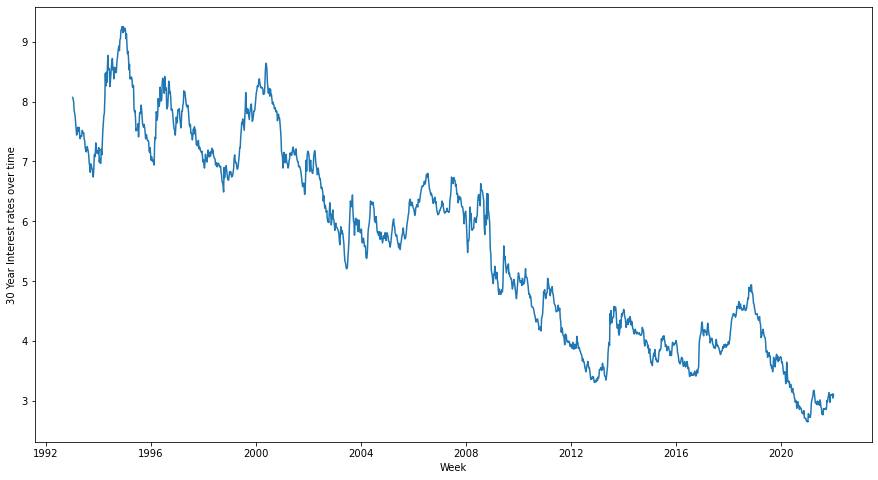

In [87]:
#This is a plot of just the 30 year rates over the partial span, from 1993 - 2021
import matplotlib.pyplot as plt
sns.lineplot(x = "Week", y = "30YrFRM",
             data = new)
plt.ylabel("30 Year Interest rates over time")
plt.gcf().set_size_inches(15, 8)
plt.xticks(WeeklyRatesOnly['Week'][::100])